# Rock Classifier

In [11]:
# Global variables
trainData = '/Users/sarah/Google Drive/Sem VII/PPIA Practica Profesional de IA/Parcial 3/Train'
validationData = '/Users/sarah/Google Drive/Sem VII/PPIA Practica Profesional de IA/Parcial 3/Validation'

tflite_file = '/Users/sarah/Google Drive/Sem VII/PPIA Practica Profesional de IA/Parcial 3/models/rock_model2.tflite'

epochs = 100
steps = 1000

IMAGE_SIZE = (100, 100)
BATCH_SIZE = 32

In [2]:
# libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Dropout, Flatten, Dense 
from tensorflow.keras import backend as K 
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from livelossplot.inputs.tf_keras import PlotLossesCallback
import os
import numpy as np
from sklearn.metrics import classification_report

In [12]:
# Data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale = 1. / 255, shear_range = 0.3, zoom_range = 0.3, horizontal_flip = True) 
test_datagen = ImageDataGenerator(rescale = 1. / 255) 

train_generator = train_datagen.flow_from_directory(
    trainData, 
    target_size = IMAGE_SIZE, 
    batch_size = BATCH_SIZE, 
    class_mode ='categorical',
    shuffle=True) 
  
validation_generator = test_datagen.flow_from_directory(
    validationData, 
    target_size = IMAGE_SIZE, 
    batch_size = BATCH_SIZE, 
    shuffle=False)

class_labels = list(validation_generator.class_indices.keys())

Found 420 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [13]:
# Create model
if K.image_data_format() == 'channels_first': 
    input_shape = (3, 100, 100) 
else: 
    input_shape = (100, 100, 3) 

model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape = input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (2,2), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), metrics=["accuracy"])

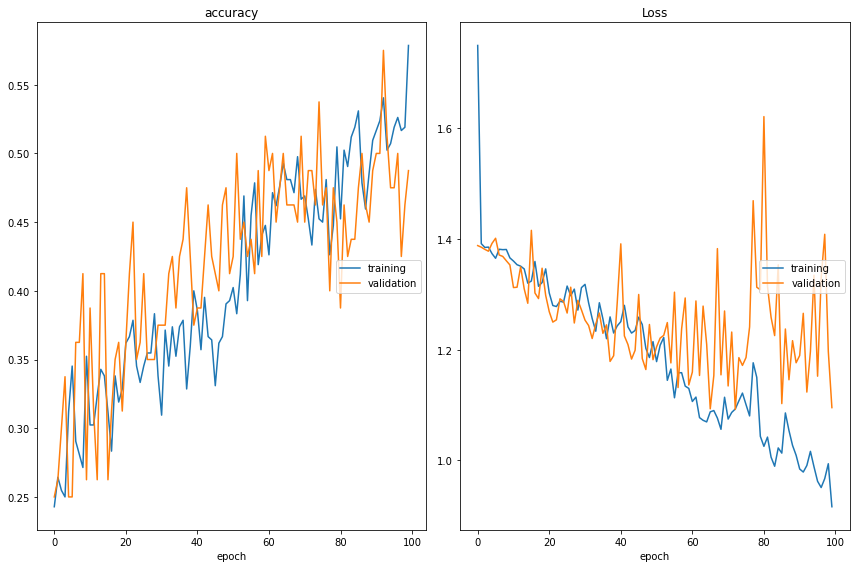

accuracy
	training         	 (min:    0.243, max:    0.579, cur:    0.579)
	validation       	 (min:    0.250, max:    0.575, cur:    0.488)
Loss
	training         	 (min:    0.916, max:    1.750, cur:    0.916)
	validation       	 (min:    1.092, max:    1.621, cur:    1.095)
14/14 [==============================] - 27s 2s/step - loss: 0.9164 - accuracy: 0.5786 - val_loss: 1.0954 - val_accuracy: 0.4875


In [14]:
# Train model
#with tf.device('/gpu:0'):
trainingmodel = model.fit(
    train_generator, 
    epochs = epochs, 
    validation_data = validation_generator, 
    callbacks=[PlotLossesCallback()], verbose=1)

#model.save_weights('gabbro_granite_diorite_granodiorite_weights.h5')
#model.save('gabbro_granite_diorite_granodiorite.h5')

In [6]:
# Test model
train_gabbro_dir = os.path.join(trainData, 'Gabbro')
train_granite_dir = os.path.join(trainData, 'Granite')
train_diorite_dir = os.path.join(trainData, 'Diorite')
train_granodiorite_dir = os.path.join(trainData, 'Granodiorite')

validation_gabbro_dir = os.path.join(validationData, 'Gabbro')
validation_granite_dir = os.path.join(validationData, 'Granite')
validation_diorite_dir = os.path.join(validationData, 'Diorite')
validation_granodiorite_dir = os.path.join(validationData, 'Granodiorite')

num_gabro_tr = len(os.listdir(train_gabbro_dir))
num_granite_tr = len(os.listdir(train_granite_dir))
num_diorite_tr = len(os.listdir(train_diorite_dir))
num_granodiorite_tr = len(os.listdir(train_granodiorite_dir))

num_gabbro_val = len(os.listdir(validation_gabbro_dir))
num_granite_val = len(os.listdir(validation_granite_dir))
num_diorite_val = len(os.listdir(validation_diorite_dir))
num_granodiorite_val = len(os.listdir(validation_granodiorite_dir))

total_train = num_gabro_tr + num_granite_tr + num_diorite_tr + num_granodiorite_tr
total_val = num_gabbro_val + num_granite_val + num_diorite_val + num_granodiorite_val

test_steps_per_epoch = np.math.ceil(validation_generator.samples / validation_generator.batch_size)

#with tf.device('/gpu:0'):
predictions = model.predict(validation_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_generator.classes

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

Instructions for updating:
Please use Model.predict, which supports generators.
              precision    recall  f1-score   support

     Diorite       0.00      0.00      0.00       105
      Gabbro       0.00      0.00      0.00       105
     Granite       0.25      1.00      0.40       105
Granodiorite       0.00      0.00      0.00       105

    accuracy                           0.25       420
   macro avg       0.06      0.25      0.10       420
weighted avg       0.06      0.25      0.10       420



/Users/sarah/opt/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
print(model.summary())
print(trainingmodel.history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2560064   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [8]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open(tflite_file, 'wb') as f:
    f.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /var/folders/lm/swytn22121v3g13l_g__jchr0000gn/T/tmpid8stgyq/assets
